In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from windpowerlib import data as wt
from windpowerlib import TurbineClusterModelChain, WindTurbine, WindFarm
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [20]:
weather_data = pd.read_csv("./weather_montreal.csv",
                           index_col=0, header=[0,1],
                          date_parser=lambda idx:pd.to_datetime(idx, utc=True))

In [21]:
turbine_lib = wt.get_turbine_types()

       manufacturer  turbine_type  has_power_curve  has_cp_curve
0       Adwen/Areva    AD116/5000             True         False
1           Enercon    E-101/3050             True          True
2           Enercon    E-101/3500             True          True
3           Enercon    E-115/3000             True          True
4           Enercon    E-115/3200             True          True
5           Enercon    E-126/4200             True          True
6           Enercon    E-126/7500             True         False
7           Enercon    E-126/7580             True         False
8           Enercon    E-141/4200             True          True
9           Enercon      E-53/800             True          True
10          Enercon     E-70/2000             True         False
11          Enercon     E-70/2300             True          True
12          Enercon     E-82/2000             True          True
13          Enercon     E-82/2300             True          True
14          Enercon     E

In [22]:
type(turbine_lib)

pandas.core.frame.DataFrame

In [23]:
selected_turbine = {"turbine_type":"E48/800", 
                    "hub_height":60, }
w_turbine = WindTurbine(**selected_turbine)

In [24]:
#wind_turbine_fleet = pd.DataFrame({"wind_turbine":[w_turbine, None],
#                                 "nums_of_turbines":[10, None]}) # 10 of wind turbines 
                                 # ,"total_capacity": [8000, None]}) 

In [25]:
farm_data = {
    "wind_turbine_fleet":[w_turbine.to_group(10)],
    "efficiency":0.9 # depends on you
}

farm_data_2 = WindFarm(**farm_data)

wind_farm_submodel = {
    "wake_losses_model":"wind_farm_efficiency", # "dena_mean" (default)
    "smoothing":True, # False (default)
    "standard_deviation_method":"turbulence_intensity", # "Staffel_Pfenniger"
    "wind_speed_model":"hellman",
    "density_model":"ideal_gas", # "barometric" (default), "interpolation-extrapolation"
    "temperature_model":"linear_gradient", # interpolation-extrapolation"
    "power_output_model":"power_curve", # "power_curve" (default)
    "density_correction":True, # False (default)
    "obstacle_height":0, # default is 0
    "hellman_exp":0.25
}

In [27]:
model_farm = TurbineClusterModelChain(farm_data_2, **wind_farm_submodel).run_model(weather_data)
farm_power_output = model_farm.power_output /1e3 # in kW

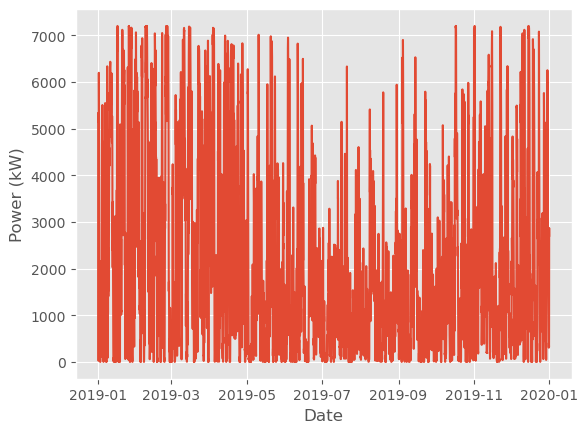

In [30]:
plt.plot(farm_power_output);
plt.xlabel("Date");
plt.ylabel("Power (kW)");